# 온라인 쇼핑몰 매출관계 분석

- 국가통계포털: https://kosis.kr/index/index.do
- 온라인쇼핑몰 판매매체별 / 상품군별거래액
- 합계등을 제외하고 선택(전기전자통신 2020년 전후로 분리되어서 미리 합침)
- 행렬을 전환
- 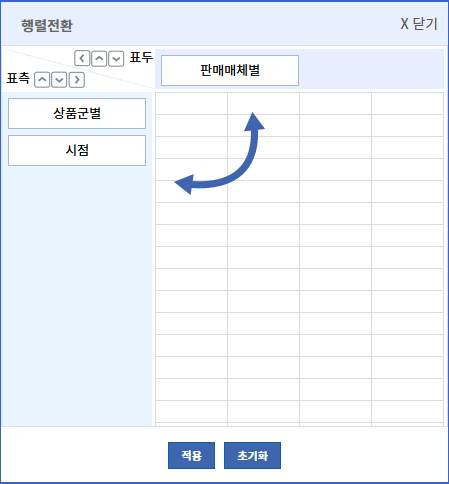

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# import matplotlib.dates as mdates

import pandas as pd
from datetime import datetime

In [3]:
# font 설정 D2coding
d2_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
matplotlib.rcParams["font.family"] = "D2coding"

In [4]:
file_path = "./ref/온라인쇼핑몰_판매매체별_상품군별거래액.csv"
ori = pd.read_csv(file_path, encoding="EUC-KR") #utf-8
ori.columns = ["category","date","internet","mobile"]
ori

,category,date,internet,mobile
0,컴퓨터 및 주변기기,2017.01,288391,133993
1,컴퓨터 및 주변기기,2017.02,329143,146200
2,컴퓨터 및 주변기기,2017.03,322089,151262
3,컴퓨터 및 주변기기,2017.04,251604,116675
4,컴퓨터 및 주변기기,2017.05,241871,109053
...,...,...,...,...
2203,기타,2024.08,61304,120200
2204,기타,2024.09,63863,126583
2205,기타,2024.10,68403,128216
2206,기타,2024.11 p),73246,135527


In [5]:
data = ori
data['date'] = ori['date'].map(lambda x: x.rstrip(' p)')) #date에 있는 P)제거
data

,category,date,internet,mobile
0,컴퓨터 및 주변기기,2017.01,288391,133993
1,컴퓨터 및 주변기기,2017.02,329143,146200
2,컴퓨터 및 주변기기,2017.03,322089,151262
3,컴퓨터 및 주변기기,2017.04,251604,116675
4,컴퓨터 및 주변기기,2017.05,241871,109053
...,...,...,...,...
2203,기타,2024.08,61304,120200
2204,기타,2024.09,63863,126583
2205,기타,2024.10,68403,128216
2206,기타,2024.11,73246,135527


In [6]:
#날짜 형식으로 바꾸기
ori['date'] = pd.to_datetime(data['date'], format = '%Y.%m')
# ori.iloc[1555:]


In [7]:
ex1_data = ori.copy()
# ex1_data[ex1_data['category'] =='컴퓨터 및 주변기기']
obj = ['문화 및 레저서비스','컴퓨터 및 주변기기','농축수산물','의복','신발','가방','음식서비스','음·식료품','애완용품','여행 및 교통서비스']
ex1_data = ex1_data[ex1_data['category'].isin(obj)]
ex1_data.sample(40)

,category,date,internet,mobile
628,가방,2021-05-01,51301,141501
1717,여행 및 교통서비스,2024-02-01,696352,1452625
619,가방,2020-08-01,45372,116548
1146,음·식료품,2024-07-01,646122,2190001
1734,문화 및 레저서비스,2017-07-01,82271,69376
595,가방,2018-08-01,45336,135402
12,컴퓨터 및 주변기기,2018-01-01,324233,187441
456,의복,2023-01-01,331433,1145700
1922,음식서비스,2017-03-01,30493,161602
598,가방,2018-11-01,43401,136635


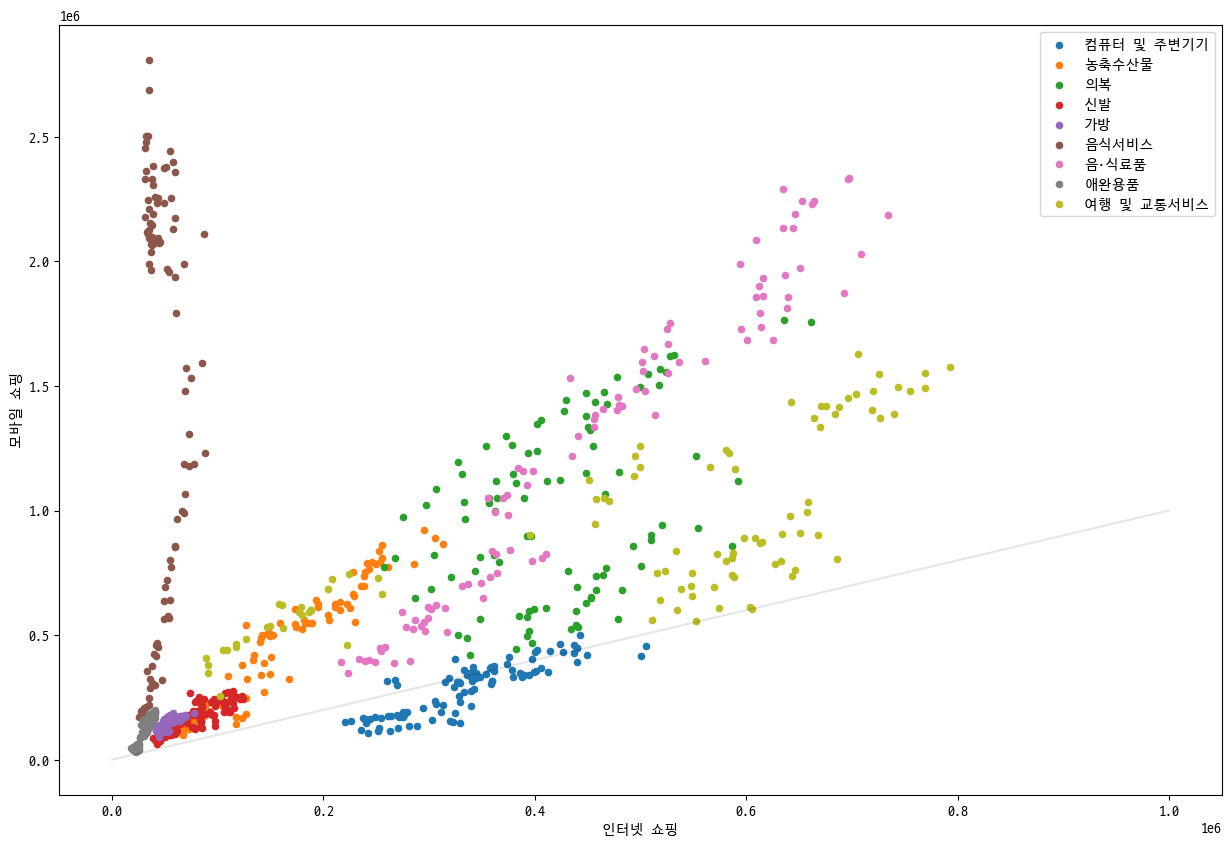

In [8]:
fig, ax = plt.subplots(figsize =(15,10))
obj = ['컴퓨터 및 주변기기','농축수산물','의복','신발','가방','음식서비스','음·식료품','애완용품','여행 및 교통서비스']
category = obj
for cate in obj:
    category_data = ex1_data[ex1_data['category']== cate]
    x_data = category_data['internet']
    y_data = category_data['mobile']
    ax.scatter(x_data, y_data,s=20, label=cate)


ax.set_xlabel("인터넷 쇼핑")
ax.set_ylabel("모바일 쇼핑")
ax.legend(loc='best')
ax.plot([0,1000000],[0,1000000],'k-',alpha=0.1)
plt.show()
# print(category_data,x_data,y_data)

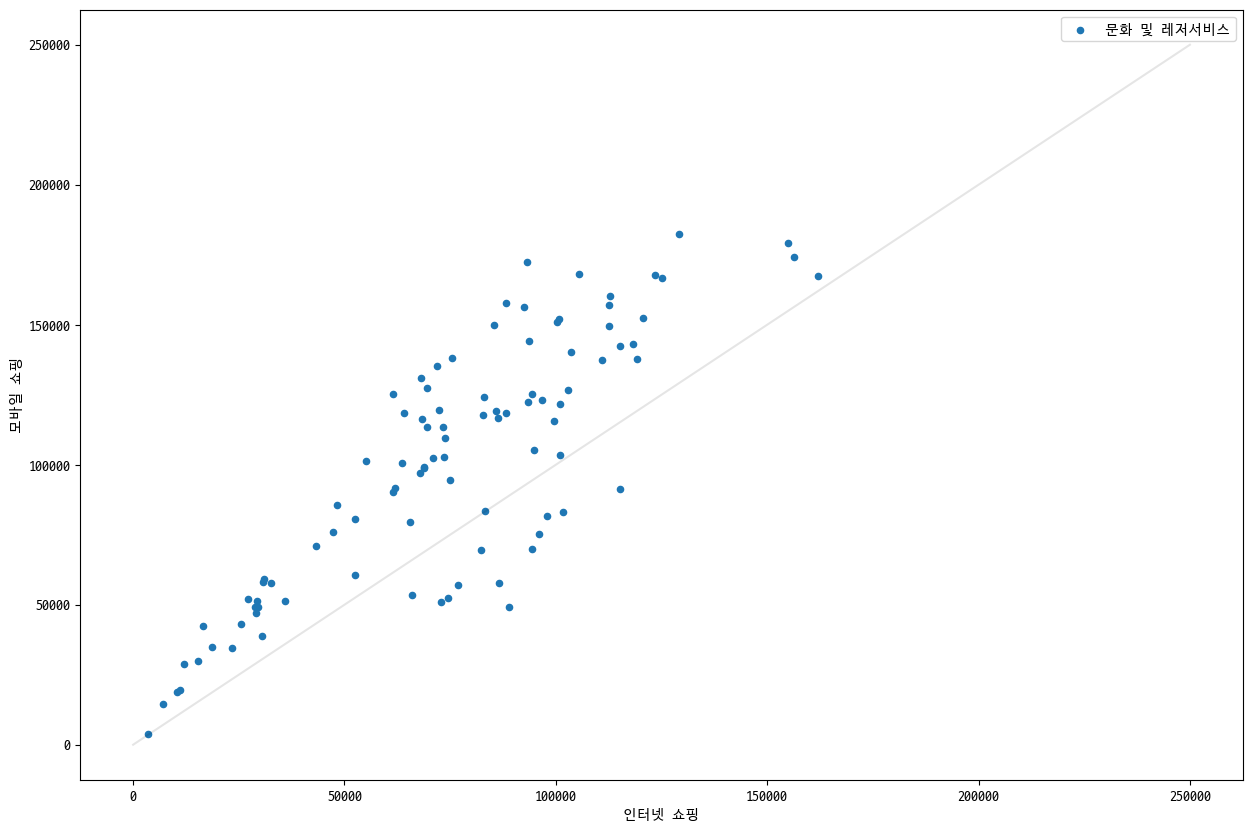

In [45]:
fig, ax = plt.subplots(figsize =(15,10))
obj = ['문화 및 레저서비스']
category = obj
for cate in obj:
    category_data = ex1_data[ex1_data['category']== cate]
    x_data = category_data['internet']
    y_data = category_data['mobile']
    ax.scatter(x_data, y_data,s=20, label=cate)


ax.set_xlabel("인터넷 쇼핑")
ax.set_ylabel("모바일 쇼핑")
ax.legend(loc='best')
ax.plot([0,250000],[0,250000],'k-',alpha=0.1)
plt.show()

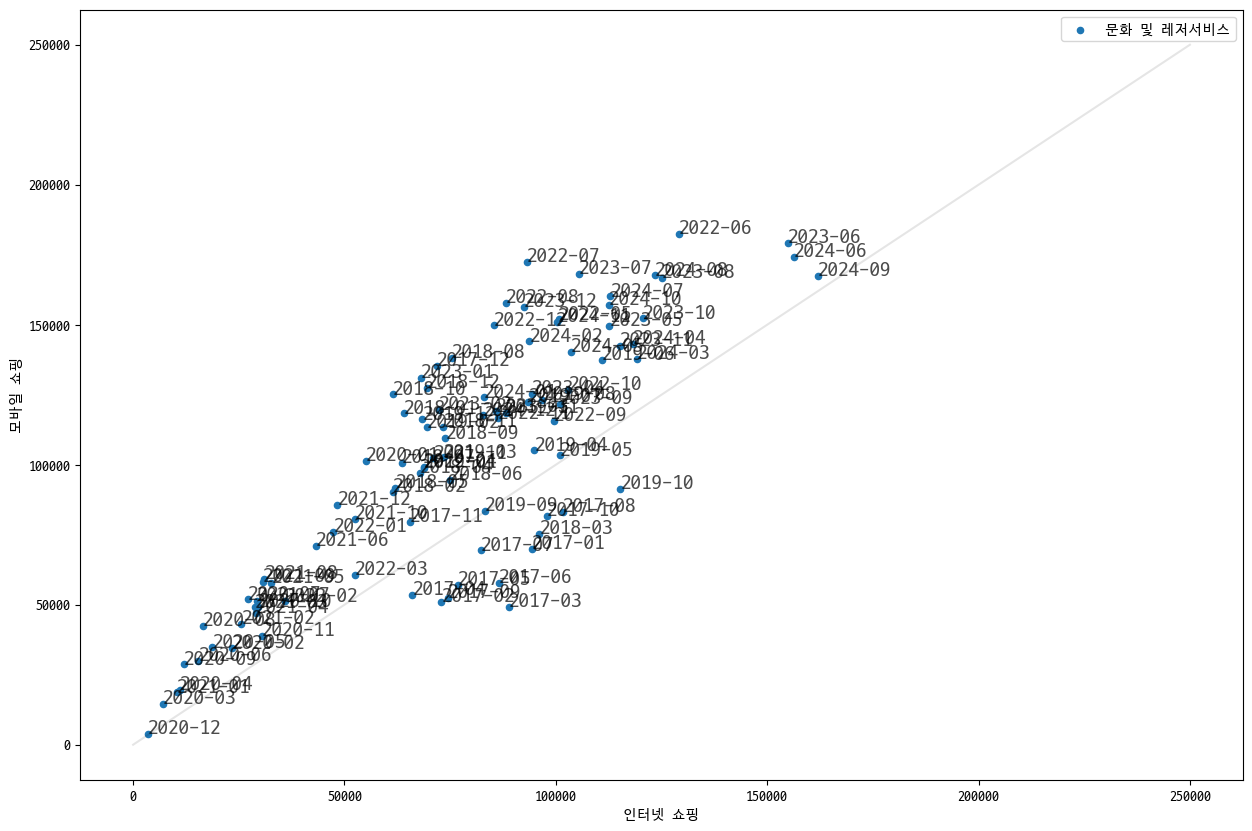

In [51]:
fig, ax = plt.subplots(figsize=(15, 10))
obj = ['문화 및 레저서비스']
category = obj

for cate in obj:
    category_data = ex1_data[ex1_data['category'] == cate]
    x_data = category_data['internet']
    y_data = category_data['mobile']
    dates = category_data['date'].dt.strftime('%Y-%m')  # 날짜 데이터가 있는 열 이름

    ax.scatter(x_data, y_data, s=20, label=cate)

    # 각 점에 날짜 레이블 추가
    for i, date in enumerate(dates):
        ax.annotate(date, (x_data.iloc[i], y_data.iloc[i]), fontsize=15, alpha=0.7)

ax.set_xlabel("인터넷 쇼핑")
ax.set_ylabel("모바일 쇼핑")
ax.legend(loc='best')
ax.plot([0, 250000], [0, 250000], 'k-', alpha=0.1)
plt.show()